### Choosing features and metrics for nearest neighbor search
Week 2 assignment for UW Clustering and retrieval class

The goal of this assignment is to (copied from the course website):
- Gain intuition for different notions of similarity and practice finding similar documents.
- Explore the tradeoffs with representing documents using raw word counts and TF-IDF
- Explore the behavior of different distance metrics by looking at the Wikipedia pages most similar to President Obama’s page.

The assignment provides parsed word counts and tf-idf in npz format.

In [3]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt      
import sframe 
from scipy.sparse import csr_matrix 
%matplotlib inline

In [131]:
wiki = sframe.SFrame('people_wiki.gl/')
wiki = wiki.add_row_number()  

In [132]:
# Let's print one example:
wiki[0]

{'URI': '<http://dbpedia.org/resource/Digby_Morrell>',
 'id': 0,
 'name': 'Digby Morrell',
 'text': 'digby morrell born 10 october 1979 is a former australian rules footballer who played with the kangaroos and carlton in the australian football league aflfrom western australia morrell played his early senior football for west perth his 44game senior career for the falcons spanned 19982000 and he was the clubs leading goalkicker in 2000 at the age of 21 morrell was recruited to the australian football league by the kangaroos football club with its third round selection in the 2001 afl rookie draft as a forward he twice kicked five goals during his time with the kangaroos the first was in a losing cause against sydney in 2002 and the other the following season in a drawn game against brisbaneafter the 2003 season morrell was traded along with david teague to the carlton football club in exchange for corey mckernan he played 32 games for the blues before being delisted at the end of 2005 

Now let's load the word count. The word count vectors are provided in a sparse matrix, where the i-th row gives the word count vectors for the i-th document. Each column corresponds to a unique word appearing in the dataset. The mapping between words and integer indices are given in people_wiki_map_index_to_word.gl


In [133]:
def load_sparse_csr(filename):
    loader = np.load(filename)
    data = loader['data']
    indices = loader['indices']
    indptr = loader['indptr']
    shape = loader['shape']
    
    return csr_matrix( (data, indices, indptr), shape)

In [134]:
word_count = load_sparse_csr('people_wiki_word_count.npz')

In [135]:
print word_count

  (0, 5877)	1
  (0, 92219)	1
  (0, 227191)	1
  (0, 446948)	1
  (0, 468870)	1
  (0, 477285)	5
  (0, 492466)	1
  (0, 509506)	1
  (0, 514262)	1
  (0, 523996)	1
  (0, 528953)	1
  (0, 529843)	1
  (0, 533540)	1
  (0, 535034)	3
  (0, 535475)	1
  (0, 538022)	1
  (0, 538168)	1
  (0, 540827)	1
  (0, 541501)	1
  (0, 541760)	1
  (0, 542488)	1
  (0, 542854)	1
  (0, 542859)	1
  (0, 542919)	1
  (0, 543517)	2
  :	:
  (59070, 547944)	1
  (59070, 547947)	1
  (59070, 547949)	1
  (59070, 547950)	1
  (59070, 547951)	1
  (59070, 547954)	1
  (59070, 547957)	2
  (59070, 547960)	2
  (59070, 547961)	1
  (59070, 547962)	1
  (59070, 547964)	4
  (59070, 547965)	2
  (59070, 547966)	6
  (59070, 547967)	1
  (59070, 547968)	4
  (59070, 547969)	1
  (59070, 547970)	8
  (59070, 547971)	3
  (59070, 547972)	6
  (59070, 547973)	1
  (59070, 547974)	2
  (59070, 547975)	6
  (59070, 547976)	6
  (59070, 547977)	9
  (59070, 547978)	14


In [136]:
# And let's find out how the indices are mapped to words
map_index_to_word = sframe.SFrame('people_wiki_map_index_to_word.gl/')

In [137]:
print map_index_to_word

+---------+------------------------+-------+
| feature |        category        | index |
+---------+------------------------+-------+
| feature |    bioarchaeologist    |   0   |
| feature |      leaguehockey      |   1   |
| feature |      electionruss      |   2   |
| feature |        teramoto        |   3   |
| feature | trumpeterpercussionist |   4   |
| feature |        spoofax         |   5   |
| feature |      mendelssohni      |   6   |
| feature |       crosswise        |   7   |
| feature |          yec           |   8   |
| feature |      asianthemed       |   9   |
+---------+------------------------+-------+
[547979 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [138]:
# Now try NN with Euclidean distance
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(metric='euclidean', algorithm='brute')
model.fit(word_count)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='euclidean',
         metric_params=None, n_neighbors=5, p=2, radius=1.0)

In [139]:
# find the row number of Obama's article 
print wiki[wiki['name'] == 'Barack Obama']

+-------+-------------------------------+--------------+
|   id  |              URI              |     name     |
+-------+-------------------------------+--------------+
| 35817 | <http://dbpedia.org/resour... | Barack Obama |
+-------+-------------------------------+--------------+
+-------------------------------+
|              text             |
+-------------------------------+
| barack hussein obama ii br... |
+-------------------------------+
[? rows x 4 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.


In [140]:
# We see the index for Obama's article is 35817
# Let's run NN with Obama's article
distances, indices = model.kneighbors(word_count[35817], n_neighbors=10) 

In [141]:
# print the results and sort by distance
neighbors = sframe.SFrame({'distance':distances.flatten(), 'id':indices.flatten()})
print wiki.join(neighbors, on='id').sort('distance')[['id','name','distance']]

+-------+----------------------------+---------------+
|   id  |            name            |    distance   |
+-------+----------------------------+---------------+
| 35817 |        Barack Obama        |      0.0      |
| 24478 |         Joe Biden          | 33.0756708171 |
| 28447 |       George W. Bush       | 34.3947670438 |
| 35357 |      Lawrence Summers      | 36.1524549651 |
| 14754 |        Mitt Romney         | 36.1662826401 |
| 13229 |      Francisco Barrio      | 36.3318042492 |
| 31423 |       Walter Mondale       | 36.4005494464 |
| 22745 | Wynn Normington Hugh-Jones | 36.4965751818 |
| 36364 |         Don Bonker         |  36.633318168 |
|  9210 |        Andy Anstett        | 36.9594372252 |
+-------+----------------------------+---------------+
[10 rows x 3 columns]



In [142]:
# Why is Francisco Barrio similar to Obama?
# Let's have a look at the top used words in those two articles
def unpack_dict(matrix, map_index_to_word):
    table = list(map_index_to_word.sort('index')['category'])
    # if you're not using SFrame, replace this line with
    ##      table = sorted(map_index_to_word, key=map_index_to_word.get)
    
    
    data = matrix.data
    indices = matrix.indices
    indptr = matrix.indptr
    
    num_doc = matrix.shape[0]

    return [{k:v for k,v in zip([table[word_id] for word_id in indices[indptr[i]:indptr[i+1]] ],
                                 data[indptr[i]:indptr[i+1]].tolist())} \
               for i in xrange(num_doc) ]

wiki['word_count'] = unpack_dict(word_count, map_index_to_word)

In [148]:
#wiki['word_count'][0]

In [144]:
def top_words(name):
    """
    Get a table of the most frequent words in the given person's wikipedia page.
    """
    row = wiki[wiki['name'] == name]
    word_count_table = row[['word_count']].stack('word_count', new_column_name=['word','count'])
    return word_count_table.sort('count', ascending=False)

obama_words = top_words('Barack Obama')
print obama_words

barrio_words = top_words('Francisco Barrio')
print barrio_words

+-------+-------+
|  word | count |
+-------+-------+
|  the  |   40  |
|   in  |   30  |
|  and  |   21  |
|   of  |   18  |
|   to  |   14  |
|  his  |   11  |
| obama |   9   |
|  act  |   8   |
|   a   |   7   |
|   he  |   7   |
+-------+-------+
[273 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.
+-----------+-------+
|    word   | count |
+-----------+-------+
|    the    |   36  |
|     of    |   24  |
|    and    |   18  |
|     in    |   17  |
|     he    |   10  |
|     to    |   9   |
| chihuahua |   7   |
|     a     |   6   |
|  governor |   6   |
|     as    |   5   |
+-----------+-------+
[225 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [145]:
# Let's find top used words for Obama and Barrio and put them side-by-side

combined_words = obama_words.join(barrio_words, on='word')
combined_words = combined_words.rename({'count':'Obama', 'count.1':'Barrio'})
combined_words.sort('Obama', ascending=False)

Columns:
	word	str
	Obama	int
	Barrio	int

Rows: 56

Data:
+------+-------+--------+
| word | Obama | Barrio |
+------+-------+--------+
| the  |   40  |   36   |
|  in  |   30  |   17   |
| and  |   21  |   18   |
|  of  |   18  |   24   |
|  to  |   14  |   9    |
| his  |   11  |   5    |
|  a   |   7   |   6    |
|  he  |   7   |   10   |
|  as  |   6   |   5    |
| was  |   5   |   4    |
+------+-------+--------+
[56 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.

#### Quiz Question 1:
Among the words that appear in both Barack Obama and Francisco Barrio, take the 5 that appear most frequently in Obama. How many of the articles in the Wikipedia dataset contain all of those 5 words?

In [146]:
# let put the 5 most common words from the Obama article into a set
common_words = set(obama_words.sort('count', ascending=False)['word'][0:5])

def has_top_words(word_count_vector):
    # extract the keys of word_count_vector and convert it to a set
    unique_words = set(word_count_vector.keys()) 
    # return True if common_words is a subset of unique_words
    # return False otherwise
    if common_words.issubset(unique_words) :
        return True
    else:
        return False  

wiki['has_top_words'] = wiki['word_count'].apply(has_top_words)


In [147]:
wiki['has_top_words'].sum() 

56066

In [112]:
# Checking:

print 'Output from your function:', has_top_words(wiki[32]['word_count'])
print 'Correct output: True'
print 'Also check the length of unique_words. It should be 167'

print 'Output from your function:', has_top_words(wiki[33]['word_count'])
print 'Correct output: False'
print 'Also check the length of unique_words. It should be 188'

Output from your function: True
Correct output: True
Also check the length of unique_words. It should be 167
Output from your function: False
Correct output: False
Also check the length of unique_words. It should be 188


#### Quiz Question 2:
Measure the pairwise distance between the Wikipedia pages of Barack Obama, George W. Bush, and Joe Biden. Which of the three pairs has the smallest distance?

In [66]:
from sklearn.metrics.pairwise import euclidean_distances

def pairwise_distance(target1, target2):
    ''' 
    compute the pairwise Euclidean distance given the names of two candidate.
    this function assumes knowledge of top_words'''
    targetlist1 = top_words(target1)
    targetlist2 = top_words(target2)
    combined_words = targetlist1.join(targetlist2, on='word')
    vector1 = combined_words['count']
    vector2 = combined_words['count.1']
    return euclidean_distances(vector1, vector2)
    # cosin similarity
    #return sum(vector1*vector2)/sum(vector1**2)**0.5/sum(vector2**2)**0.5


In [65]:
print pairwise_distance('George W. Bush','Barack Obama')
print pairwise_distance('George W. Bush', 'Joe Biden')
print pairwise_distance('Barack Obama', 'Joe Biden')


[[ 17.97220076]]
[[ 13.67479433]]
[[ 22.42766149]]


#### Quiz Question 3 
Collect all words that appear both in Barack Obama and George W. Bush pages. Out of those words, find the 10 words that show up most often in Obama's page.



In [67]:
bush_words = top_words('George W. Bush')
combined_words = obama_words.join(bush_words, on='word')
combined_words = combined_words.rename({'count':'Obama', 'count.1':'Bush'})
print combined_words.sort('Obama', ascending=False)

+------+-------+------+
| word | Obama | Bush |
+------+-------+------+
| the  |   40  |  39  |
|  in  |   30  |  22  |
| and  |   21  |  14  |
|  of  |   18  |  14  |
|  to  |   14  |  11  |
| his  |   11  |  6   |
| act  |   8   |  3   |
|  a   |   7   |  6   |
|  he  |   7   |  8   |
| law  |   6   |  1   |
+------+-------+------+
[86 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


#### TF-IDF (term frequency - inverse document frequency)

We can see that those mostly used words are not very meaningful. That's a problem with simple word count. Now let's try some TF-IDF.

In [149]:
tf_idf = load_sparse_csr('people_wiki_tf_idf.npz')

In [150]:
wiki['tf_idf'] = unpack_dict(tf_idf, map_index_to_word)

In [151]:
# Let's create a new model with tf-idf 
model_tf_idf = NearestNeighbors(metric='euclidean', algorithm='brute')
model_tf_idf.fit(tf_idf)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='euclidean',
         metric_params=None, n_neighbors=5, p=2, radius=1.0)

In [152]:
# and do a NN search on Obama's article
distances, indices = model_tf_idf.kneighbors(tf_idf[35817], n_neighbors=10)

In [153]:
neighbors = sframe.SFrame({'distance':distances.flatten(), 'id':indices.flatten()})
print wiki.join(neighbors, on='id').sort('distance')[['id', 'name', 'distance']]

+-------+-------------------------+---------------+
|   id  |           name          |    distance   |
+-------+-------------------------+---------------+
| 35817 |       Barack Obama      |      0.0      |
|  7914 |      Phil Schiliro      | 106.861013691 |
| 46811 |      Jeff Sessions      | 108.871674216 |
| 44681 |  Jesse Lee (politician) | 109.045697909 |
| 38376 |      Samantha Power     | 109.108106165 |
|  6507 |       Bob Menendez      | 109.781867105 |
| 38714 | Eric Stern (politician) |  109.95778808 |
| 44825 |      James A. Guest     | 110.413888718 |
| 44368 |   Roland Grossenbacher  |  110.4706087  |
| 33417 |      Tulsi Gabbard      | 110.696997999 |
+-------+-------------------------+---------------+
[10 rows x 3 columns]



Let's determine whether this list makes sense.

- With a notable exception of Roland Grossenbacher, the other 8 are all American politicians who are contemporaries of Barack Obama.
- Phil Schiliro, Jesse Lee, Samantha Power, and Eric Stern worked for Obama.

Clearly, the results are more plausible with the use of TF-IDF. Let's take a look at the word vector for Obama and Schilirio's pages. Notice that TF-IDF representation assigns a weight to each word. This weight captures relative importance of that word in the document. Let us sort the words in Obama's article by their TF-IDF weights; we do the same for Schiliro's article as well.

In [117]:
def top_words_tf_idf(name):
    row = wiki[wiki['name'] == name]
    word_count_table = row[['tf_idf']].stack('tf_idf', new_column_name=['word','weight'])
    return word_count_table.sort('weight', ascending=False)

obama_tf_idf = top_words_tf_idf('Barack Obama')
print obama_tf_idf

schiliro_tf_idf = top_words_tf_idf('Phil Schiliro')
print schiliro_tf_idf

+-------------+---------------+
|     word    |     weight    |
+-------------+---------------+
|    obama    | 43.2956530721 |
|     act     |  27.678222623 |
|     iraq    |  17.747378588 |
|   control   | 14.8870608452 |
|     law     | 14.7229357618 |
|   ordered   | 14.5333739509 |
|   military  | 13.1159327785 |
|   response  | 12.7843852412 |
| involvement | 12.7843852412 |
|  democratic | 12.4106886973 |
+-------------+---------------+
[273 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.
+-----------------+---------------+
|       word      |     weight    |
+-----------------+---------------+
|     schiliro    | 21.9729907785 |
|      staff      | 15.8564416352 |
|  congressional  | 13.5470876563 |
| daschleschiliro | 10.9864953892 |
|      obama      | 9.62125623824 |
|      waxman     | 9.04058524017 |
|    president    | 9.03358661416 |
|     2014from    | 8.68391029623 |
|    

#### Quiz Question 4 
Among the words that appear in both Barack Obama and Phil Schiliro, take the 5 that have largest weights in Obama. How many of the articles in the Wikipedia dataset contain all of those 5 words?

In [85]:
combined_words = obama_tf_idf.join(schiliro_tf_idf, on='word')
combined_words = combined_words.rename({'weight':'Obama', 'weight.1':'Schiliro'})
print combined_words.sort('Obama', ascending=False)

+--------------+---------------+---------------+
|     word     |     Obama     |    Schiliro   |
+--------------+---------------+---------------+
|    obama     | 43.2956530721 | 9.62125623824 |
|     law      | 14.7229357618 | 7.36146788088 |
|  democratic  | 12.4106886973 | 6.20534434867 |
|    senate    | 10.1642881797 |  3.3880960599 |
| presidential |  7.3869554189 | 3.69347770945 |
|  president   | 7.22686929133 | 9.03358661416 |
|    policy    | 6.09538628214 | 3.04769314107 |
|    states    | 5.47320098963 | 1.82440032988 |
|    office    | 5.24817282322 | 2.62408641161 |
|     2011     | 5.10704127031 | 3.40469418021 |
+--------------+---------------+---------------+
[47 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [165]:
# let put the 5 most common words from the Obama article into a set
common_words_tfidf = set(obama_tf_idf.sort('weight', ascending=False)['word'][0:5])

def has_top_words_tfidf(word_count_vector):
    # extract the keys of word_count_vector and convert it to a set
    unique_words_tf_idf = set(word_count_vector.keys()) 
    # return True if common_words is a subset of unique_words
    # return False otherwise
    if common_words_tfidf .issubset(unique_words_tf_idf) :
        return True
    else:
        return False  



In [166]:
wiki['tfide_has_top_words'] = wiki['tf_idf'].apply(has_top_words_tfidf)


In [167]:
print wiki['tfide_has_top_words'][0:10].sum()

0


In [168]:
print wiki['tfide_has_top_words'].sum()

2


#### Choosing metrics

You may wonder why Joe Biden, Obama's running mate in two presidential elections, is missing from the query results of model_tf_idf. Let's find out why. First, compute the distance between TF-IDF features of Obama and Biden.

#### Quiz Question 5:
Compute the Euclidean distance between TF-IDF features of Obama and Biden.

The distance is larger than the distances we found for the 10 nearest neighbors. But one may wonder, is Biden's article that different from Obama's, more so than, say, Schiliro's? It turns out that, when we compute nearest neighbors using the Euclidean distances, we unwittingly favor short articles over long ones. Let us compute the length of each Wikipedia document, and examine the document lengths for the 100 nearest neighbors to Obama's page.

In [176]:
def tfidf_distance(target1, target2):
    ''' 
    compute the pairwise Euclidean distance given the names of two candidate.
    this function assumes knowledge of top_words'''
    targetlist1 = top_words_tf_idf(target1)
    #print targetlist1
    targetlist2 = top_words_tf_idf(target2)
    #print targetlist2
    combined_words = targetlist1.join(targetlist2, on='word')
    #print combined_words
    vector1 = combined_words['weight']
    vector2 = combined_words['weight.1']
    return euclidean_distances(vector1, vector2)
    # cosin similarity
    #return sum(vector1*vector2)/sum(vector1**2)**0.5/sum(vector2**2)**0.5


In [179]:
# my answer doesn't seem to be normalized in the same way?

#print tfidf_distance('Barack Obama', 'Phil Schiliro' )/106.861013691
# doesn't look right. It's too small?

print tfidf_distance('Barack Obama', 'Joe Biden')*106.861013691/ tfidf_distance('Barack Obama', 'Phil Schiliro' )

#print tfidf_distance('Barack Obama','Barack Obama')

[[ 109.29746649]]


It turns out that, when we compute nearest neighbors using the Euclidean distances, we unwittingly favor short articles over long ones. Let us compute the length of each Wikipedia document, and examine the document lengths for the 100 nearest neighbors to Obama's page.

In [91]:
# Comptue length of all documents
def compute_length(row):
    return len(row['text'].split(' '))
wiki['length'] = wiki.apply(compute_length)

# Compute 100 nearest neighbors and display their lengths
distances, indices = model_tf_idf.kneighbors(tf_idf[35817], n_neighbors=100)
neighbors = sframe.SFrame({'distance':distances.flatten(), 'id':indices.flatten()})
nearest_neighbors_euclidean = wiki.join(neighbors, on='id')[['id', 'name', 'length', 'distance']].sort('distance')
print nearest_neighbors_euclidean

+-------+-------------------------+--------+---------------+
|   id  |           name          | length |    distance   |
+-------+-------------------------+--------+---------------+
| 35817 |       Barack Obama      |  540   |      0.0      |
|  7914 |      Phil Schiliro      |  208   | 106.861013691 |
| 46811 |      Jeff Sessions      |  230   | 108.871674216 |
| 44681 |  Jesse Lee (politician) |  216   | 109.045697909 |
| 38376 |      Samantha Power     |  310   | 109.108106165 |
|  6507 |       Bob Menendez      |  220   | 109.781867105 |
| 38714 | Eric Stern (politician) |  255   |  109.95778808 |
| 44825 |      James A. Guest     |  215   | 110.413888718 |
| 44368 |   Roland Grossenbacher  |  201   |  110.4706087  |
| 33417 |      Tulsi Gabbard      |  228   | 110.696997999 |
+-------+-------------------------+--------+---------------+
[100 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and colu

To see how these document lengths compare to the lengths of other documents in the corpus, let's make a histogram of the document lengths of Obama's 100 nearest neighbors and compare to a histogram of document lengths for all documents.

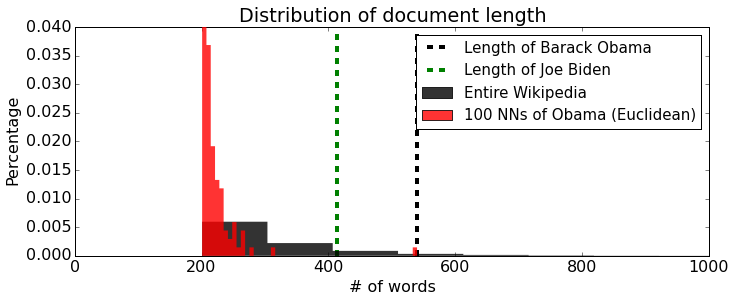

In [92]:
plt.figure(figsize=(10.5,4.5))
plt.hist(wiki['length'], 50, color='k', edgecolor='None', histtype='stepfilled', normed=True,
         label='Entire Wikipedia', zorder=3, alpha=0.8)
plt.hist(nearest_neighbors_euclidean['length'], 50, color='r', edgecolor='None', histtype='stepfilled', normed=True,
         label='100 NNs of Obama (Euclidean)', zorder=10, alpha=0.8)
plt.axvline(x=wiki['length'][wiki['name'] == 'Barack Obama'][0], color='k', linestyle='--', linewidth=4,
           label='Length of Barack Obama', zorder=2)
plt.axvline(x=wiki['length'][wiki['name'] == 'Joe Biden'][0], color='g', linestyle='--', linewidth=4,
           label='Length of Joe Biden', zorder=1)
plt.axis([0, 1000, 0, 0.04])

plt.legend(loc='best', prop={'size':15})
plt.title('Distribution of document length')
plt.xlabel('# of words')
plt.ylabel('Percentage')
plt.rcParams.update({'font.size':16})
plt.tight_layout()

#### Remove bias towards short articles with cosine distances

Relative to the rest of Wikipedia, nearest neighbors of Obama are overwhelmingly short, most of them being shorter than 300 words. The bias towards short articles is not appropriate in this application as there is really no reason to favor short articles over long articles (they are all Wikipedia articles, after all). Many Wikipedia articles are 300 words or more, and both Obama and Biden are over 300 words long.

Both word-count features and TF-IDF are proportional to word frequencies. While TF-IDF penalizes very common words, longer articles tend to have longer TF-IDF vectors simply because they have more words in them.

To remove this bias, we turn to cosine distances:

d(x,y)=1−xTy/∥x∥∥y∥

In [93]:
model2_tf_idf = NearestNeighbors(algorithm='brute', metric='cosine')
model2_tf_idf.fit(tf_idf)
distances, indices = model2_tf_idf.kneighbors(tf_idf[35817], n_neighbors=100)
neighbors = sframe.SFrame({'distance':distances.flatten(), 'id':indices.flatten()})
nearest_neighbors_cosine = wiki.join(neighbors, on='id')[['id', 'name', 'length', 'distance']].sort('distance')
print nearest_neighbors_cosine

+-------+-------------------------+--------+--------------------+
|   id  |           name          | length |      distance      |
+-------+-------------------------+--------+--------------------+
| 35817 |       Barack Obama      |  540   | -1.11022302463e-15 |
| 24478 |        Joe Biden        |  414   |   0.703138676734   |
| 38376 |      Samantha Power     |  310   |   0.742981902328   |
| 57108 |  Hillary Rodham Clinton |  580   |   0.758358397887   |
| 38714 | Eric Stern (politician) |  255   |   0.770561227601   |
| 46140 |       Robert Gibbs      |  257   |   0.784677504751   |
|  6796 |       Eric Holder       |  232   |   0.788039072943   |
| 44681 |  Jesse Lee (politician) |  216   |   0.790926415366   |
| 18827 |       Henry Waxman      |  279   |   0.798322602893   |
|  2412 |     Joe the Plumber     |  217   |   0.799466360042   |
+-------+-------------------------+--------+--------------------+
[100 rows x 4 columns]
Note: Only the head of the SFrame is printed.
You can

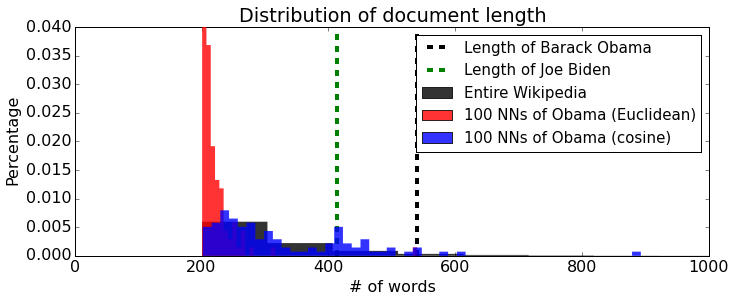

In [94]:
# Now the result makes much more sense!
# Let's vidualize it.

plt.figure(figsize=(10.5,4.5))
plt.figure(figsize=(10.5,4.5))
plt.hist(wiki['length'], 50, color='k', edgecolor='None', histtype='stepfilled', normed=True,
         label='Entire Wikipedia', zorder=3, alpha=0.8)
plt.hist(nearest_neighbors_euclidean['length'], 50, color='r', edgecolor='None', histtype='stepfilled', normed=True,
         label='100 NNs of Obama (Euclidean)', zorder=10, alpha=0.8)
plt.hist(nearest_neighbors_cosine['length'], 50, color='b', edgecolor='None', histtype='stepfilled', normed=True,
         label='100 NNs of Obama (cosine)', zorder=11, alpha=0.8)
plt.axvline(x=wiki['length'][wiki['name'] == 'Barack Obama'][0], color='k', linestyle='--', linewidth=4,
           label='Length of Barack Obama', zorder=2)
plt.axvline(x=wiki['length'][wiki['name'] == 'Joe Biden'][0], color='g', linestyle='--', linewidth=4,
           label='Length of Joe Biden', zorder=1)
plt.axis([0, 1000, 0, 0.04])
plt.legend(loc='best', prop={'size':15})
plt.title('Distribution of document length')
plt.xlabel('# of words')
plt.ylabel('Percentage')
plt.rcParams.update({'font.size': 16})
plt.tight_layout()

#### Problem with TF-IDF? Let's look at a tweet

+--------------------------------------------------------+

|                                             +--------+ |

|  One that shall not be named                | Follow | |

|  @username                                  +--------+ |

|                                                        |

|  Democratic governments control law in response to     |

|  popular act.                                          |

|                                                        |

|  8:05 AM - 16 May 2016                                 |

|                                                        |

|  Reply   Retweet (1,332)   Like (300)                  |

|                                                        |

+--------------------------------------------------------+

In [98]:
tweet = {'act': 3.4597778278724887,
 'control': 3.721765211295327,
 'democratic': 3.1026721743330414,
 'governments': 4.167571323949673,
 'in': 0.0009654063501214492,
 'law': 2.4538226269605703,
 'popular': 2.764478952022998,
 'response': 4.261461747058352,
 'to': 0.04694493768179923}

In [99]:
word_indices = [map_index_to_word[map_index_to_word['category']==word][0]['index'] for word in tweet.keys()]
tweet_tf_idf = csr_matrix( (list(tweet.values()), ([0]*len(word_indices), word_indices)),
                          shape=(1, tf_idf.shape[1]) )

In [100]:
from sklearn.metrics.pairwise import cosine_distances

obama_tf_idf = tf_idf[35817]
print cosine_distances(obama_tf_idf, tweet_tf_idf)

[[ 0.70591838]]


In [101]:
distances, indices = model2_tf_idf.kneighbors(obama_tf_idf, n_neighbors=10)
print distances

[[ -1.11022302e-15   7.03138677e-01   7.42981902e-01   7.58358398e-01
    7.70561228e-01   7.84677505e-01   7.88039073e-01   7.90926415e-01
    7.98322603e-01   7.99466360e-01]]


### Take away of this exercise:

- TF_IDF can pick up important words, but is biased towards shorter articles.
- cosine distance could be a good way to calibrate the effect of length, but we do not always want to use it. Sometimes we want to treat tweets and long articles differently so we do not want to use cosine distance for that.
